In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
subsahara_df = pd.read_csv(r'data\subsaharan-africa.csv')

In [3]:
subsahara_df.sample(10)

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
151,Chad,2004,3.500000,2.45,0.20,NaN,84.00,0.11,0.0,0.01,...,105.93550,5.000000,449.999988,NaN,33.629372,454.336365,13,1284000.0,15.454166,18.732207
523,Malawi,2019,11.200000,1.20,21.94,101610000.0,73.02,0.20,0.0,1.50,...,537.81980,3.180000,1450.000048,NaN,5.448181,591.846390,203,118484.0,-13.254308,34.301525
502,Madagascar,2019,31.040000,0.90,7.31,43730000.0,82.77,1.10,0.0,0.91,...,678.70404,8.560000,4119.999886,NaN,4.411232,522.989524,48,587041.0,-18.766947,46.869107
540,Mali,2015,37.600000,0.90,21.36,9440000.0,79.93,1.05,0.0,1.27,...,952.77563,5.230000,3650.000095,NaN,6.171800,751.472887,17,1240192.0,17.570692,-3.996166
57,Botswana,2015,62.130000,61.70,1.01,NaN,25.58,2.79,0.0,0.00,...,10171.93500,3.150000,6949.999809,NaN,-5.717683,6402.910183,4,581730.0,-22.328474,24.684866
239,Equatorial Guinea,2008,65.573410,22.10,6.51,NaN,7.23,0.41,0.0,0.05,...,30431.82200,1.820000,9779.999733,NaN,17.799109,22942.610100,50,28051.0,1.650801,10.267895
259,Eritrea,2007,36.864292,6.80,0.28,510000.0,79.80,0.27,0.0,0.00,...,818.48190,4.622241,509.999991,NaN,1.426822,439.832103,35,117600.0,15.179384,39.782334
64,Burkina Faso,2001,9.521352,2.90,2.72,15360000.0,83.68,0.27,0.0,0.05,...,386.41492,5.150000,970.000000,NaN,6.613406,267.097600,76,274200.0,12.238333,-1.561593
747,Seychelles,2012,98.391365,100.00,0.00,NaN,0.78,0.39,0.0,0.00,...,43465.02000,2.830000,430.000007,NaN,1.260829,12006.682960,214,455.0,-4.679574,55.491977
455,Lesotho,2014,27.800000,35.80,36.76,9270000.0,42.39,0.00,0.0,0.52,...,2074.06350,9.150000,610.000014,NaN,1.710544,1194.575627,71,30355.0,-29.609988,28.233608


In [4]:
subsahara_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            953 non-null    object 
 1   Year                                                              953 non-null    int64  
 2   Access to electricity (% of population)                           944 non-null    float64
 3   Access to clean fuels for cooking                                 953 non-null    float64
 4   Renewable-electricity-generating-capacity-per-capita              953 non-null    float64
 5   Financial flows to developing countries (US $)                    579 non-null    float64
 6   Renewable energy share in the total final energy consumption (%)  908 non-null    float64
 7   Electricity from fossil fuels (TWh)

In [5]:
subsahara_df = subsahara_df.drop(columns=['Renewables (% equivalent primary energy)'])
subsahara_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 20 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            953 non-null    object 
 1   Year                                                              953 non-null    int64  
 2   Access to electricity (% of population)                           944 non-null    float64
 3   Access to clean fuels for cooking                                 953 non-null    float64
 4   Renewable-electricity-generating-capacity-per-capita              953 non-null    float64
 5   Financial flows to developing countries (US $)                    579 non-null    float64
 6   Renewable energy share in the total final energy consumption (%)  908 non-null    float64
 7   Electricity from fossil fuels (TWh)

In [6]:
subsahara_df.isnull().sum()

Entity                                                                0
Year                                                                  0
Access to electricity (% of population)                               9
Access to clean fuels for cooking                                     0
Renewable-electricity-generating-capacity-per-capita                  0
Financial flows to developing countries (US $)                      374
Renewable energy share in the total final energy consumption (%)     45
Electricity from fossil fuels (TWh)                                   0
Electricity from nuclear (TWh)                                        0
Electricity from renewables (TWh)                                     0
Low-carbon electricity (% electricity)                                0
Primary energy consumption per capita (kWh/person)                    0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          57
Value_co2_emissions_kt_by_country                               

In [7]:
subsahara_df.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country', 'gdp_growth', 'gdp_per_capita',
       'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude', 'Longitude'],
      dtype='object')

<Axes: >

<Figure size 1600x1600 with 0 Axes>

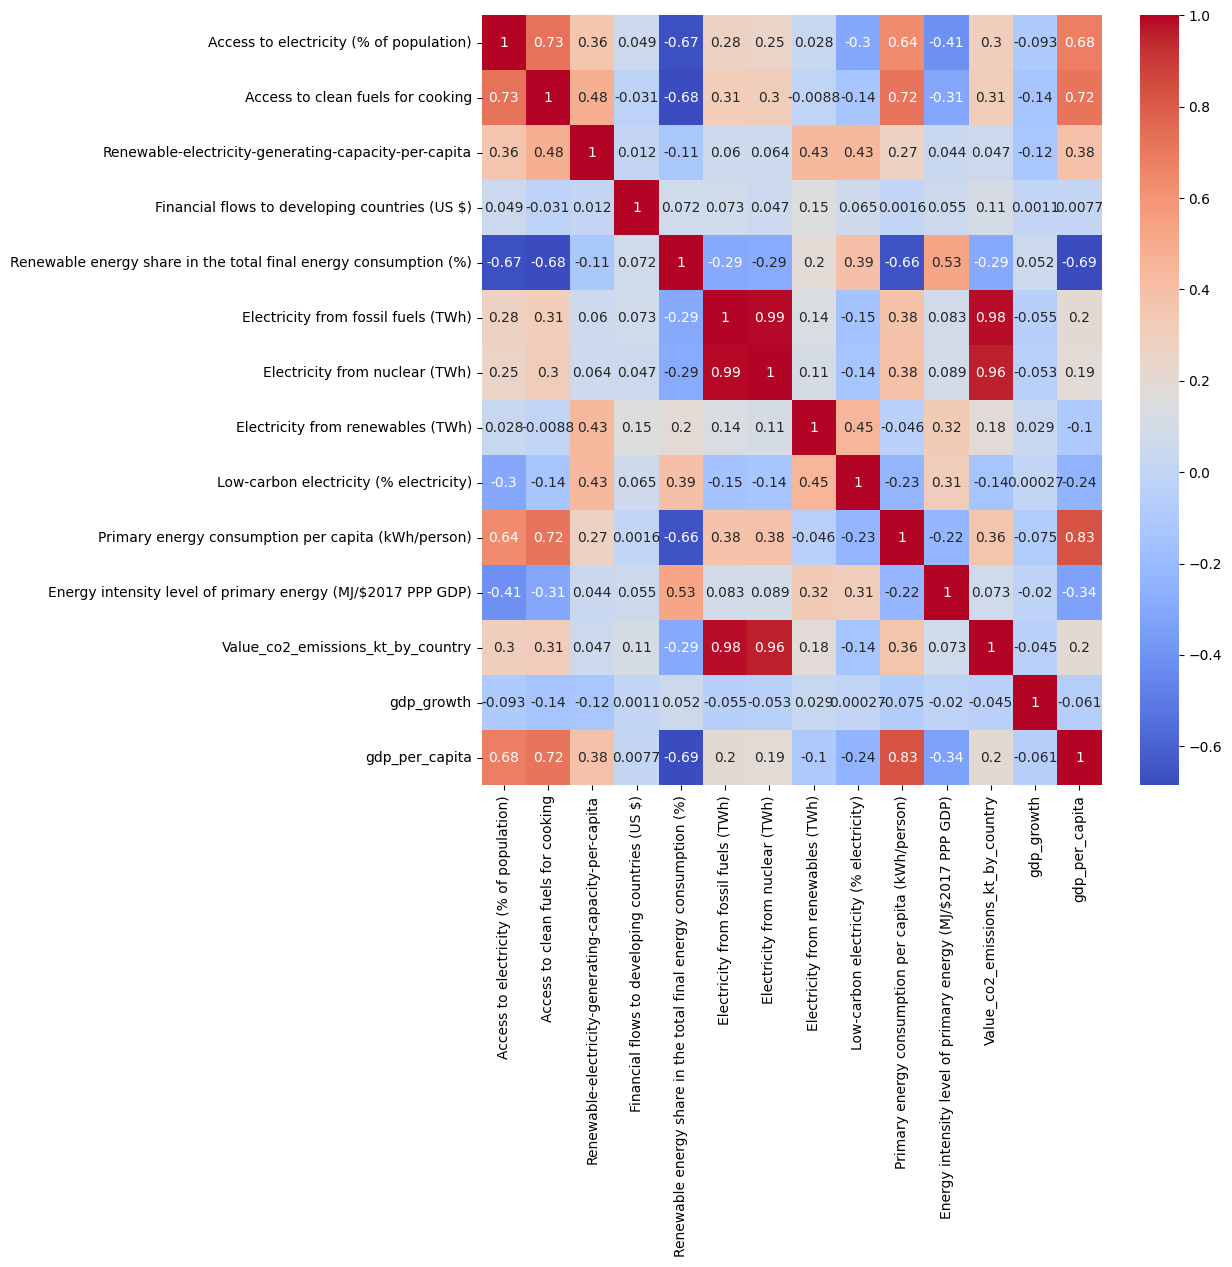

In [8]:
# correlation matrix
plt.figure(figsize=(16, 16))
corr = subsahara_df.drop(columns=['Year', 'Longitude', 'Latitude', 'Land Area(Km2)', r'Density\n(P/Km2)']).corr(numeric_only=True)
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [9]:
subsahara_df.corr(numeric_only=True)

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
Year,1.000000,0.276325,0.082174,0.122022,0.097734,-0.108928,0.015322,0.002297,0.153713,-0.031013,0.013617,-0.147526,0.031640,-0.156764,0.154183,-0.006090,0.002347,0.004348,0.005246
Access to electricity (% of population),0.276325,1.000000,0.726479,0.360752,0.048893,-0.667688,0.276699,0.254847,0.028473,-0.299901,0.635511,-0.410649,0.298695,-0.093301,0.677645,0.190003,-0.144048,-0.199852,0.208461
Access to clean fuels for cooking,0.082174,0.726479,1.000000,0.479990,-0.031210,-0.684371,0.312172,0.303554,-0.008794,-0.138588,0.720296,-0.305547,0.307674,-0.144902,0.722150,0.046068,0.035631,-0.398299,0.301294
Renewable-electricity-generating-capacity-per-capita,0.122022,0.360752,0.479990,1.000000,0.011953,-0.114437,0.059897,0.063612,0.430238,0.433355,0.269305,0.043855,0.047337,-0.124436,0.381222,-0.012107,0.034072,-0.540044,0.201130
Financial flows to developing countries (US $),0.097734,0.048893,-0.031210,0.011953,1.000000,0.072168,0.072637,0.047101,0.152192,0.065111,0.001590,0.055336,0.109188,0.001085,0.007689,0.020824,0.105231,0.034058,0.028413
Renewable energy share in the total final energy consumption (%),-0.108928,-0.667688,-0.684371,-0.114437,0.072168,1.000000,-0.292279,-0.287587,0.195170,0.388463,-0.657629,0.530848,-0.293887,0.052146,-0.685810,-0.042182,0.081148,0.190340,-0.158661
Electricity from fossil fuels (TWh),0.015322,0.276699,0.312172,0.059897,0.072637,-0.292279,1.000000,0.987871,0.136319,-0.147518,0.380876,0.082842,0.983199,-0.055100,0.200857,-0.063095,0.213159,-0.310706,0.022682
Electricity from nuclear (TWh),0.002297,0.254847,0.303554,0.063612,0.047101,-0.287587,0.987871,1.000000,0.109834,-0.138115,0.382095,0.088894,0.960261,-0.053065,0.194612,-0.068876,0.196566,-0.320401,0.025521
Electricity from renewables (TWh),0.153713,0.028473,-0.008794,0.430238,0.152192,0.195170,0.136319,0.109834,1.000000,0.451175,-0.045781,0.321857,0.184673,0.029306,-0.102353,-0.135521,0.301805,-0.222089,0.152566
Low-carbon electricity (% electricity),-0.031013,-0.299901,-0.138588,0.433355,0.065111,0.388463,-0.147518,-0.138115,0.451175,1.000000,-0.228142,0.305677,-0.144476,0.000271,-0.243401,-0.036532,0.147824,-0.367419,0.137090


In [10]:
subsahara_df['Low-carbon electricity (TWh)'] = subsahara_df['Electricity from nuclear (TWh)'] + subsahara_df['Electricity from renewables (TWh)']

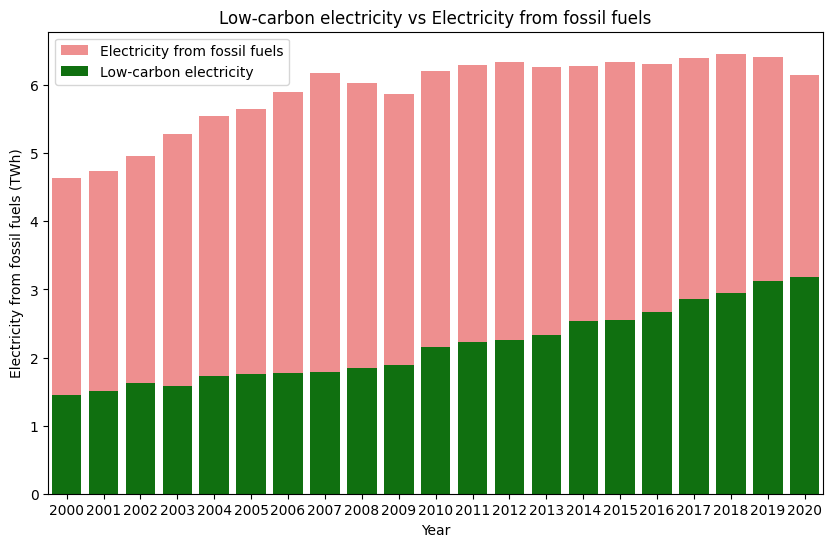

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(data=subsahara_df, x='Year', y='Electricity from fossil fuels (TWh)', color='red', label='Electricity from fossil fuels', alpha=0.5, errorbar=None)
sns.barplot(data=subsahara_df, x='Year', y='Low-carbon electricity (TWh)', color='green', label='Low-carbon electricity', errorbar=None)
plt.legend()
plt.title('Low-carbon electricity vs Electricity from fossil fuels')
plt.show()


In [12]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [13]:
subsahara_df.groupby('Entity')['Electricity from nuclear (TWh)'].sum().sort_values(ascending=False)

Entity
South Africa                265.55
Angola                        0.00
Senegal                       0.00
Mali                          0.00
Mauritania                    0.00
Mauritius                     0.00
Mozambique                    0.00
Namibia                       0.00
Niger                         0.00
Nigeria                       0.00
Rwanda                        0.00
Sao Tome and Principe         0.00
Seychelles                    0.00
Benin                         0.00
Sierra Leone                  0.00
Somalia                       0.00
South Sudan                   0.00
Sudan                         0.00
Togo                          0.00
Uganda                        0.00
Yemen                         0.00
Zambia                        0.00
Malawi                        0.00
Madagascar                    0.00
Liberia                       0.00
Lesotho                       0.00
Botswana                      0.00
Burkina Faso                  0.00
Burundi      

In [16]:
import plotly.express as px

# Example dataset with renewable energy share
df_map = subsahara_df[['Entity', 'Renewable energy share in the total final energy consumption (%)', 'Latitude', 'Longitude']].dropna()

# Plot a choropleth map using Plotly Express
fig = px.scatter_geo(df_map, 
                     lat='Latitude', 
                     lon='Longitude', 
                     color='Renewable energy share in the total final energy consumption (%)',
                     hover_name='Entity', 
                     size='Renewable energy share in the total final energy consumption (%)',
                     projection='natural earth')

fig.update_layout(
    title="Renewable Energy Share by Country",
    geo=dict(showframe=False, showcoastlines=False)
)

fig.show()

In [19]:
# Example dataset with CO2 emissions
df_map_co2 = subsahara_df[['Entity', 'Value_co2_emissions_kt_by_country', 'Latitude', 'Longitude']].dropna()

# Plot a choropleth map using Plotly Express
fig = px.scatter_geo(df_map_co2, 
                     lat='Latitude', 
                     lon='Longitude', 
                     color='Value_co2_emissions_kt_by_country',
                     hover_name='Entity', 
                     size='Value_co2_emissions_kt_by_country',
                     projection='natural earth')

fig.update_layout(
    title="CO2 Emissions by Country",
    geo=dict(showframe=False, showcoastlines=False)
)

fig.show()


In [21]:
subsahara_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            953 non-null    object 
 1   Year                                                              953 non-null    int64  
 2   Access to electricity (% of population)                           944 non-null    float64
 3   Access to clean fuels for cooking                                 953 non-null    float64
 4   Renewable-electricity-generating-capacity-per-capita              953 non-null    float64
 5   Financial flows to developing countries (US $)                    579 non-null    float64
 6   Renewable energy share in the total final energy consumption (%)  908 non-null    float64
 7   Electricity from fossil fuels (TWh)

In [25]:
lowest_countries=['Chad', 'Niger', 'Burkina Faso', 'South Sudan', 'Central African Republic', 'Congo', 'Burundi', 'Malaw',  'Sierra Leone']

subsahara_df[subsahara_df['Entity'].isin(lowest_countries)][['Entity', 'Value_co2_emissions_kt_by_country', 'Low-carbon electricity (TWh)']]

# plot map of countries with lowest CO2 emissions
df_map_co2_lowest = subsahara_df[subsahara_df['Entity'].isin(lowest_countries)][['Entity', 'Value_co2_emissions_kt_by_country', 'Latitude', 'Longitude']].dropna()

# Plot a choropleth map using Plotly Express
fig = px.scatter_geo(df_map_co2_lowest, 
                     lat='Latitude', 
                     lon='Longitude', 
                     color='Value_co2_emissions_kt_by_country',
                     hover_name='Entity', 
                     size='Value_co2_emissions_kt_by_country',
                     projection='natural earth')

fig.update_layout(
    title="CO2 Emissions by Country",
    geo=dict(showframe=False, 
             showcoastlines=False,
             showland=True, landcolor="LightGreen",
             showocean=True, oceancolor="LightBlue",
             showlakes=False, lakecolor="Blue",
             showrivers=False, rivercolor="Blue")
)

fig.show()